In [10]:
#Import require packages
import numpy as np
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.embed import file_html
from bokeh.resources import CDN
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models import HoverTool, Button, CustomJS

In [2]:
#source the data
df = pd.read_csv(r"\Mall_Customers.csv")
#pick only the columns we'll need
df=df.drop(columns=["CustomerID","Genre","Age"],axis=1)
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


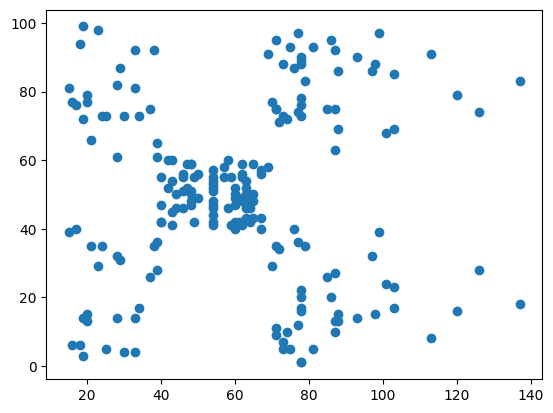

In [3]:
#plot a scatterplot of the income against spending score
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])

In [5]:
#Filter warnings
warnings.filterwarnings('ignore', category=FutureWarning)
#create a within cluster sum of squares list between 1 and 21
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

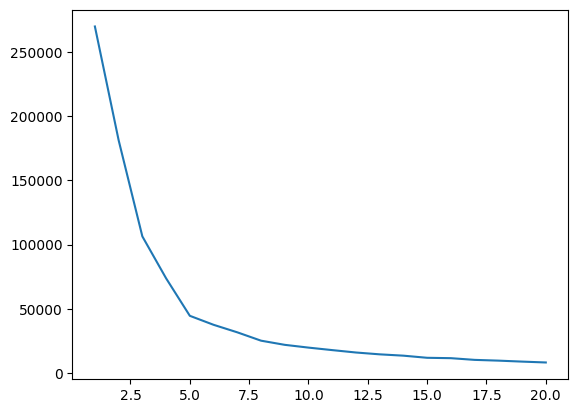

In [6]:
#determine the elbow point by plotting the wcss on the no of clusters
plt.plot(range(1,21),wcss)

In [7]:
#We identify the elbow point at 5 therefore, we can classify the data into 5 clusters
#extract the data from the df
X=df.iloc[:,:].values

#create a k means object and set the clusters to 5
km=KMeans(n_clusters=5)

#fit the k means algorithm to the data x and predict the cliuster assignments for each data point
y_means=km.fit_predict(X)

In [ ]:
# Add a scatter plot to the figure and use bokeh to embed the plot intoa html file
p = figure( x_axis_label='Income level', y_axis_label='Expenses', 
            background_fill_color='black',
            background_fill_alpha=1,
            border_fill_color='white',
            border_fill_alpha=0.5,
            height=300,
            width=500,
            hidpi = True
            
           )
#p.grid.grid_line_color = None
p.toolbar_location='below'

p.circle(X[y_means == 0,0],X[y_means == 0,1],color='blue',legend_label='Sensible')
p.circle(X[y_means == 1,0],X[y_means == 1,1],color='red',legend_label='Careful')
p.circle(X[y_means == 2,0],X[y_means == 2,1],color='green',legend_label='Target')
p.circle(X[y_means == 3,0],X[y_means == 3,1],color='yellow',legend_label='Careless')
p.circle(X[y_means == 4,0],X[y_means == 4,1],color='purple',legend_label='Standard')
#p.legend()
#p.xlabel("Annual Income (k$)")
#p.ylabel("Spending Score (1-100")
#p.show()


# Add the HoverTool
hover = HoverTool()
hover.tooltips = [("Income", "@x"), ("Expenses", "@y")]
p.add_tools(hover)

# Show the results
output_notebook()
# Get the HTML content with embedded plot
html_content = file_html(p, CDN)
#show(layout)
# Write the HTML content to a file in a specific directory
output_file_path = "/interactive_plot.html"
with open(output_file_path, "w") as f:
    f.write(html_content)
    print("Exported html file!")